## 실습

### UCI Machine Learning Repository 의 Auto MPG dataset 을 사용하여 Regression 예측 model 작성

auto-mpg.data - data file  
auto-mpg.names - data 설명 file

1. mpg:           continuous  
2. cylinders:     multi-valued discrete  
3. displacement:  continuous (배기량)   
4. horsepower:    continuous  
5. weight:        continuous  
6. acceleration:  continuous  
7. model year:    multi-valued discrete  
8. origin:        multi-valued discrete, 1 - USA, 2 - Europe, 3 - Japan  
9. car name:      string (unique for each instance)  

Missing Attribute Values:  horsepower has 6 missing values  ==> "?" 로 들어 있으므로 read_csv 시 nan 으로 변환

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Data load 및 Preprocessing

In [16]:
data_path = keras.utils.get_file("auto-mpg.data", 
                                 "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

rawdata = pd.read_csv(data_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

rawdata.dropna(inplace=True)

data = rawdata.copy()

data = pd.get_dummies(data, columns=['cylinders', 'origin'])

label = data.pop('mpg')

data.head()

,displacement,horsepower,weight,acceleration,model year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,307.0,130.0,3504.0,12.0,70,0,0,0,0,1,1,0,0
1,350.0,165.0,3693.0,11.5,70,0,0,0,0,1,1,0,0
2,318.0,150.0,3436.0,11.0,70,0,0,0,0,1,1,0,0
3,304.0,150.0,3433.0,12.0,70,0,0,0,0,1,1,0,0
4,302.0,140.0,3449.0,10.5,70,0,0,0,0,1,1,0,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(data.values, label.values)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train.shape

(294, 13)

### Regression Model Build

### train

### predict

### $r^2$ 계산

In [4]:
model = Sequential()

model.add(Dense(32, input_shape=(13,)))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))

In [5]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [6]:
history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_test, y_test),
                   verbose=1)

Train on 294 samples, validate on 98 samples
Epoch 1/50
294/294 [==============================] - 1s 3ms/sample - loss: 600.2728 - mse: 600.2728 - val_loss: 604.6235 - val_mse: 604.6235
Epoch 2/50
294/294 [==============================] - 0s 92us/sample - loss: 590.6593 - mse: 590.6594 - val_loss: 595.6092 - val_mse: 595.6092
Epoch 3/50
294/294 [==============================] - 0s 95us/sample - loss: 581.2336 - mse: 581.2336 - val_loss: 586.6835 - val_mse: 586.6835
Epoch 4/50
294/294 [==============================] - 0s 88us/sample - loss: 571.8526 - mse: 571.8526 - val_loss: 577.7049 - val_mse: 577.7049
Epoch 5/50
294/294 [==============================] - 0s 95us/sample - loss: 562.4711 - mse: 562.4711 - val_loss: 568.5652 - val_mse: 568.5652
Epoch 6/50
294/294 [==============================] - 0s 92us/sample - loss: 552.8700 - mse: 552.8700 - val_loss: 559.1178 - val_mse: 559.1178
Epoch 7/50
294/294 [==============================] - 0s 92us/sample - loss: 542.9772 - mse: 542.9

In [7]:
model.evaluate(X_test, y_test, verbose=0)

[12.326788766043526, 12.326789]

In [8]:
y_predict = model.predict(X_test)

In [9]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

0.7965547563820534

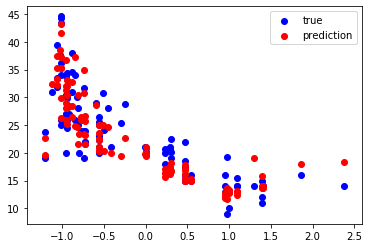

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_test[:, 0], y_test, c='b', label="true")
plt.scatter(X_test[:, 0], y_predict, c='r', label="prediction")
plt.legend()